In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

In [4]:
path = "d:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers"
print("Path to dataset files:", path)

Path to dataset files: d:/Rawan/NTI/repo/NTI-Computer-Vision/task 5/flowers


In [5]:
def creat_my_data(dataset_path):
  X = []
  y = []
  for cls in os.listdir(dataset_path):
    images_paths = os.listdir(f'{dataset_path}/{cls}')
    images_paths = [f'{dataset_path}/{cls}/{img}' for img in images_paths]
    labels = [cls] * len(images_paths)
    X.extend(images_paths)
    y.extend(labels)
  return X, y


In [6]:
X, y = creat_my_data(path)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
)
val_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3453 validated image filenames belonging to 5 classes.


In [11]:
val = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 864 validated image filenames belonging to 5 classes.


In [12]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l2(0.001), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Binary output
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

d:\Rawan\NTI\repo\NTI-Computer-Vision\task 6\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
earlystop = EarlyStopping(patience=2, restore_best_weights=True)

In [14]:
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
    
)


d:\Rawan\NTI\repo\NTI-Computer-Vision\task 6\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 90s 816ms/step - accuracy: 0.4503 - loss: 2.2105 - val_accuracy: 0.2581 - val_loss: 5.3318
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 102s 945ms/step - accuracy: 0.5288 - loss: 1.8660 - val_accuracy: 0.2581 - val_loss: 6.8873
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 79s 730ms/step - accuracy: 0.5760 - loss: 1.7114 - val_accuracy: 0.2662 - val_loss: 4.8741
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 59s 547ms/step - accuracy: 0.5818 - loss: 1.7162 - val_accuracy: 0.3171 - val_loss: 3.0510
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 526ms/step - accuracy: 0.5931 - loss: 1.6479 - val_accuracy: 0.5579 - val_loss: 1.8774
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 66s 608ms/step - accuracy: 0.6131 - loss: 1.5762 - val_accuracy: 0.6377 - val_loss: 1.5437
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 872ms/step - accuracy: 0.6308 - loss: 1.5280 - val_accuracy: 0.6644 - val_loss: 1.4594
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 92s 853ms/step - accuracy: 0.6461 - loss: 

In [15]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.2f}")
print(f"Final Validation Accuracy: {val_acc:.2f}")

Final Training Accuracy: 0.72
Final Validation Accuracy: 0.73


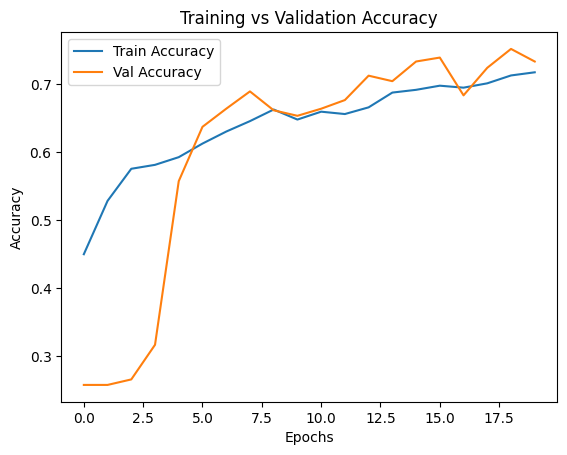

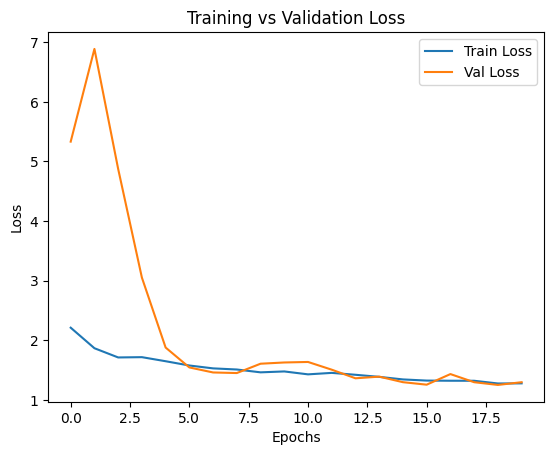

In [16]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
model.save('myModel.keras')